# **ASESORIA PUNTO 8**

## **¿Qué es el modelado de temas?**

-El modelado de temas es un método para la clasificación **no supervisada** de documentos, similar a la agrupación en clústeres de datos numéricos, que encuentra algunos grupos naturales de elementos (temas) incluso cuando no estamos seguros de lo que estamos buscando.

-Un documento puede contener varios temas

-Cada tema tiene varias palabras que le pertenecen


<img src="https://www.researchgate.net/profile/Tunazzina-Islam/publication/333865994/figure/fig3/AS:771340751630337@1560913374509/Topic-Modeling-using-LSA-NMF-and-LDA-After-topic-modeling-we-identify-topic-topics.ppm" width=700, height=350  class=center/>






## **Latent Dirichlet Allocation (LDA)**

El objetivo de LDA es encontrar temas a los que pertenece un documento, en función de las palabras que contiene.

Cada documento es solo una colección de palabras o una “bolsa de palabras”. Así, el orden de las palabras y el rol gramatical de las palabras no se consideran en el modelo.


<img src="https://www.researchgate.net/profile/Diego-Buenano-Fernandez/publication/339368709/figure/fig1/AS:860489982689280@1582168207260/Schematic-of-LDA-algorithm.png" width=700, height=350  class=center/>



 ## **Preparación**


In [3]:
# actualización de sklearn
!pip install update sklearn

In [2]:
# librerias

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import warnings
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# init
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
scopus = pd.read_csv("https://gitlab.com/luisvasv/public/-/raw/master/datasets/001.analitica.predictiva/004.documents.csv")
scopus.head(5)

location  length                                               data
0       US     820  THE OBJECTIVE OF THIS PROJECT IS TO DEVELOP A ...
1       US    1693  MOST HEALTHCARE DATA WAREHOUSES INCLUDE BIG DA...
2       US    1223  CAR SHARING IS ONE THE PILLARS OF A SMART TRAN...
3       US    1285  COMMUNITY STRUCTURE IS THOUGHT TO BE ONE OF TH...
4       US    1054  THIS PAPER DEVELOPS AN ECONOMIC PRODUCTION QUA...

## **Remover emails, caracteres de nueva linea, y comillas**


La limpieza de datos es el proceso de identificar y corregir datos corruptos, incompletos, duplicados, incorrectos e irrelevantes de un conjunto de referencia, tabla o base de datos. 

Los problemas de datos suelen surgir a través de errores de entrada del usuario, captura de datos incompleta, formatos no estándar y problemas de integración de datos.


<img src="https://mlt24cspfhbn.i.optimole.com/-ALoOU0.hQGL~11bc/w:1200/h:938/q:100/https://www.iteratorshq.com/wp-content/uploads/2020/09/data_cleaning_cycle.jpg" width=500, height=350  class=center/>


In [ ]:
# consideraciones
"""
para filtrar columnas en pandas se hacen de dos formas:

columna unica:
forma 1 --> df["columna"] 
forma 1 --> df.columna

multiple columna
df[["columna_1, columna_n"]]


Ejemplo:
"""

In [7]:
scopus.data

0     THE OBJECTIVE OF THIS PROJECT IS TO DEVELOP A ...
1     MOST HEALTHCARE DATA WAREHOUSES INCLUDE BIG DA...
2     CAR SHARING IS ONE THE PILLARS OF A SMART TRAN...
3     COMMUNITY STRUCTURE IS THOUGHT TO BE ONE OF TH...
4     THIS PAPER DEVELOPS AN ECONOMIC PRODUCTION QUA...
                            ...                        
95    MANY EMPIRICAL STUDIES ASSESSING THE ECONOMIC ...
96    URBAN REDEVELOPMENT IS THE RECONSTRUCTION OR U...
97    CO-CLUSTERING REFERS TO THE PROBLEM OF DERIVIN...
98    TODAY'S DEVELOPED COUNTRIES ARE NETWORKED SOCI...
99                              [NO ABSTRACT AVAILABLE]
Name: data, Length: 100, dtype: object

In [8]:
# limpieza

datos = scopus.data.values.tolist()

# Remove Emails
datos = [re.sub(r'\S*@\S*\s?', '', sent) for sent in datos]
# Remove new line characters
datos = [re.sub(r'\s+', ' ', sent) for sent in datos]
# Remove distracting single quotes
datos = [re.sub(r"\'", "", sent) for sent in datos]
pprint(datos[:1])

['THE OBJECTIVE OF THIS PROJECT IS TO DEVELOP A FLEXIBLE OBSERVATION MODE FOR '
 'A GEOMAGNETIC ABNORMAL PHENOMENA TRACKING SYSTEM. THE INSTRUMENT, BASED ON '
 'RING CORE FLUXGATE MAGNETOMETER TECHNOLOGY, IMPROVES THE FIELD ENVIRONMENT '
 'PERFORMANCE. USING WIRELESS TECHNOLOGY PROVIDES ON-THE-SPOT MOBILE '
 'NETWORKING FOR THE OBSERVATIONAL DATA, WITH EFFICIENT ACCESS TO THE '
 'EARTHQUAKE PRECURSOR OBSERVATION NETWORK. IT PROVIDES A POWERFUL DETECTION '
 'METHOD FOR EARTHQUAKE SHORT-TERM PREDICTION THROUGH INSTALLATION OF A '
 'LOW-NOISE FLUXGATE MAGNETOMETER ARRAY, INTENSELY OBSERVING THE PHENOMENON OF '
 'GEOMAGNETIC DISTURBANCES AND ABNORMAL LOW-FREQUENCY ELECTROMAGNETIC SIGNALS '
 'IN DIFFERENT LATITUDES, THEN CARRYING OUT OBSERVATIONAL DATA PROCESSING AND '
 'EXPLORING THE RELATIONSHIP BETWEEN EARTHQUAKE ACTIVITY AND GEOMAGNETIC FIELD '
 'CHANGES.']


# Tokenización

Tokenizar, este paso convierte una cadena de texto en una lista de palabras  (tokens).

<img src="https://miro.medium.com/max/400/1*cBNK7yaF076DpWWYGXqonw.png" width=500, height=350  class=center/>


In [9]:
#Convert a document into a list of tokens
def sent_to_words(sentences):
  for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(datos))  #datos tokenizados
print(data_words[:1])

[['the', 'objective', 'of', 'this', 'project', 'is', 'to', 'develop', 'flexible', 'observation', 'mode', 'for', 'geomagnetic', 'abnormal', 'phenomena', 'tracking', 'system', 'the', 'instrument', 'based', 'on', 'ring', 'core', 'fluxgate', 'magnetometer', 'technology', 'improves', 'the', 'field', 'environment', 'performance', 'using', 'wireless', 'technology', 'provides', 'on', 'the', 'spot', 'mobile', 'networking', 'for', 'the', 'observational', 'data', 'with', 'efficient', 'access', 'to', 'the', 'earthquake', 'precursor', 'observation', 'network', 'it', 'provides', 'powerful', 'detection', 'method', 'for', 'earthquake', 'short', 'term', 'prediction', 'through', 'installation', 'of', 'low', 'noise', 'fluxgate', 'magnetometer', 'array', 'intensely', 'observing', 'the', 'phenomenon', 'of', 'geomagnetic', 'disturbances', 'and', 'abnormal', 'low', 'frequency', 'electromagnetic', 'signals', 'in', 'different', 'latitudes', 'then', 'carrying', 'out', 'observational', 'data', 'processing', 'and

## **Lematización**

**Reducción del documento a sustantivos, adjetivos, verbos y adverbios**

**tagger**: componente entrenable para predecir etiquetas.

**parser** : Analizador de dependencias que aprende conjuntamente la segmentación de oraciones.

**ner**: Reconocedor de entidades que identifica tramos de tokens. 

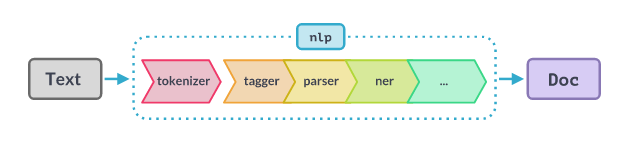

**Documentación Spacy**: https://spacy.io/usage/processing-pipelines

In [10]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

  # Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])  
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) #select noun and verb
print(data_lemmatized[:2])


['objective project develop flexible observation mode geomagnetic abnormal phenomenon tracking system instrument base re core magnetometer technology improve field environment performance use wireless technology provide spot mobile networking observational datum efficient access earthquake precursor observation network provide powerful detection method earthquake short term prediction installation low intensely observe phenomenon geomagnetic disturbance abnormal low frequency electromagnetic signal different latitude then carry observational data processing explore relationship earthquake activity geomagnetic field change', 'most datum warehouse include big datum such health plan medical pharmacy claim information many thousand sometimes million insured individual make possible identify multiple chronic condition may benefit participation care coordination program mean improve health objective article describe how large database include individual claim datum other small type datum sur

## **Matriz documento término**

In [11]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,# minimum reqd occurences of a word 
                             stop_words='english', # remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,    # max number of uniq words    
                            )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [12]:
terms = vectorizer.get_feature_names()
len(terms)

115

## **LDA con sklearn**: 



In [13]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,           # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',  # learning method
                                      random_state=100,          # Random state
                                      #batch_size=128,           # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs      
                                     )

lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


## **Perplejidad**

Perplejidad es una medida de qué tan bien un modelo de probabilidad se ajusta a un nuevo conjunto de datos

La perplejidad puede evaluar fácilmente la convergencia del modelo de entrenamiento.

Al llamar a la función lda.perplexity (X), puede conocer la perplejidad de entrenamiento actual. 

In [14]:
#Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Perplexity:  208.3102005806316
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# comando de ayuda
# help("sklearn.decomposition.LatentDirichletAllocation")

## **Búsqueda de hiperparametros**

In [15]:
# Define Search Param
search_params = {'n_components': [5, 15, 20], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid= search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 max_iter=5, random_state=0),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 15, 20]})

In [16]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -3223.138886910139
Model Perplexity:  135.0371966354139


# **Matriz documentos - tema**

In [17]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(datos))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics


## **Matriz Tema- Palabras clave**

In [18]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

access    affect       aim  ...       way      work      year
Topic0  1.983999  1.231660  1.406205  ...  1.055919  1.361942  1.233022
Topic1  1.093263  0.986709  0.978403  ...  1.157899  1.123717  1.012959
Topic2  0.746946  1.122389  0.974357  ...  0.927123  1.250016  1.188192
Topic3  0.998750  2.856257  0.922103  ...  1.282340  0.935836  0.900107
Topic4  2.308236  1.395264  1.641362  ...  1.612452  2.403546  2.402377

[5 rows x 115 columns]

# **n palabras dominantes por tema**

In [19]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0   Word 1      Word 2  ...   Word 12     Word 13   Word 14
Topic 0      use     city       model  ...   network      access   provide
Topic 1    datum      use       urban  ...  analysis       paper    result
Topic 2  network  process   structure  ...  research  experiment       set
Topic 3   affect   social  population  ...     datum     control     group
Topic 4    datum      use      method  ...    result     provide  approach

[5 rows x 15 columns]

**Descripción del problema**
---

Uno de los principales problemas abordados en minería de texto consiste en la extracción de los temas o tópicos a los que pertenece documento. Por ejemplo, una noticia podría pertener simultáneamente a los temas de religión y economía (el escándalo por el manejo de fondos del Vaticano). Cuando se tiene un conjunto de documentos, se desea extraer los tópicos subyacentes sobre los que tratan los documentos.

Scikit-learn contiene una implementación de la metodología Latent Dirichlet Allocation, la cual permite extraer los tópicos de un conjunto de documentos. Véase https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

Utilice esta metodología para extraer los tópicos subyacentes en los abstracts de los artículos. Tenga en cuenta que:

1. Debe establecer como obtener el número apropiado de tópicos a obtener.

2. Debe eliminar las stop-words.

3. En T-Lab sugieren reducir las palabras a sustantivos, adjetivos, verbos y adverbios únicamente. Cómo podría realizar esto en su código=?

4. Cómo podría verificar si la cantidad de temas es apropiada desde el punto de vista de su contenido (las palabras que contiene y los temas que trata)?
